<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title4.png' width=500/></center>

# 4.데이터프레임 변경

- 데이터 전처리를 위해 꼭 익혀두어야 할 내용입니다.
- 반복 학습과 실습을 통해서 익숙해져야 합니다.

In [44]:
# 라이브러리 불러오기
import pandas as pd

In [45]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/tips(2).csv'
tip = pd.read_csv(path)

# 확인
tip.head()

,total_bill_amount,tip,male_female,smoke_yes_no,week_name,dinner_lunch,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4.1.열 이름 변경

- 기존 데이터프레임의 열 이름을 적절히 변경해야 할 경우가 있습니다.
- 또는 집계 결과를 가진 열 이름을 이해하기 쉽게 변경해야 할 경우도 있습니다.

**1) 일부 열 이름 변경**

- **rename()** 메서드를 사용해 변경 전후의 열 이름을 딕셔너리 형태로 나열하는 방법으로 변경합니다.
- **inplace=True** 옵션을 설정해야 변경 사항이 실제 반영이 됩니다.
- 다음과 같이 열 이름을 변경합니다.
    - total_bill_amount → total_bill
    - male_female → sex
    - smoke_yes_no → smoker
    - week_name → day
    - dinner_lunch → time

In [3]:
# rename() 함수로 열 이름 변경
tip.rename(columns={'total_bill_amount': 'total_bill',
                    'male_female': 'sex',
                    'smoke_yes_no': 'smoker',
                    'week_name': 'day',
                    'dinner_lunch': 'time'}, inplace=True)

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2) 모든 열 이름 변경**

- 모든 열 이름을 변경할 때는 **columns** 속성을 변경합니다.
- 변경이 필요없는 열은 기존 이름을 부여해 변경합니다.


In [47]:
# 모든 열 이름 변경
tip.columns = ['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## 4.2.열 추가

- 새로운 열을 추가하여 기존 데이터에서 계산된 결괏값을 저장해야할 경우가 있습니다.
- total_bill에 tip을 더한 값을 갖는 final_amt 열을 추가합니다.

In [48]:
# data 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [49]:
# final_amt 열 추가
tip['final_amt'] = tip['total_bill'] + tip['tip']

# 확인
tip.head()

,total_bill,tip,sex,smoker,day,time,size,final_amt
0,16.99,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,3.61,Female,No,Sun,Dinner,4,28.20


- insert() 메서드를 사용하면 원하는 위치에 열을 추가할 수 있습니다.


In [50]:
# tip 열 앞에 div_tb 열 추가
tip.insert(1, 'div_tb', tip['total_bill'] / tip['size'])

# 확인
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size,final_amt
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2,18.00
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3,12.00
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3,24.51
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2,26.99
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4,28.20


## 4.3.열 삭제

- 뭔가를 삭제할 때는 **항상 조심x100** 해야 합니다.

**1) 열 하나 삭제**

- **drop()** 메서드를 사용해 열을 삭제합니다.
- axis=0: 행 삭제(기본 값)
- axis=1: 열 삭제
- **inplace=True** 옵션을 지정해야 실제로 반영이 됩니다.


In [51]:
# 열 하나 삭제
tip.drop('final_amt', axis=1, inplace=True)

# 확인
tip.head()

,total_bill,div_tb,tip,sex,smoker,day,time,size
0,16.99,8.495000,1.01,Female,No,Sun,Dinner,2
1,10.34,3.446667,1.66,Male,No,Sun,Dinner,3
2,21.01,7.003333,3.50,Male,No,Sun,Dinner,3
3,23.68,11.840000,3.31,Male,No,Sun,Dinner,2
4,24.59,6.147500,3.61,Female,No,Sun,Dinner,4


**2) 여러 열 삭제**

- 삭제할 열을 리스트 형태로 전달해 한 번에 여러 열을 제거할 수 있습니다.

In [52]:
# 열 두 개 삭제
tip.drop(['div_tb', 'day'], axis=1, inplace=True)

# 확인
tip.head()

,total_bill,tip,sex,smoker,time,size
0,16.99,1.01,Female,No,Dinner,2
1,10.34,1.66,Male,No,Dinner,3
2,21.01,3.50,Male,No,Dinner,3
3,23.68,3.31,Male,No,Dinner,2
4,24.59,3.61,Female,No,Dinner,4


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

[문1] pandas 라이브러리를 불러오세요.

In [9]:
# 라이브러리 불러오기



[문2] 다음 경로의 파일을 읽어 titanic 데이터프레임을 만드세요.

- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'

**[titanic 데이터 셋 정보]**

- Survived: 생존여부(1=Yes, 0=No)
- Pclass: 객실등급(1=1st, 2=2nd, 3=3rd)
- Sex: 성별(male, female)
- Age: 나이
- Sibsp: 탑승한 형제자매, 배우자 수
- Parch: 탑승한 자녀, 부모 수
- Ticket: 티켓 번호
- Fare: 요금
- Cabin: 캐빈 번호
- Embarked: 출발한 항구((C=Cherbourg, Q=Queenstown, S=Southampton)

In [10]:
# 파일 읽어오기



[문3] 상위 5개 행을 확인하세요.

In [11]:
# 상위 5개 확인



[문4] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 4-1) PassengerId, Name, Ticket, Cabin 열을 한 번에 삭제하세요.
- 4-2) Sex 열 이름을 Male로 변경하세요.
- 4-3) SibSp 열과 Parch 열의 값을 더한 결과를 갖는 Family 열을 추가하세요.
- 4-4) SibSp, Parch 두 열을 삭제하세요.
- 4-5) 결과를 확인하세요.

In [12]:
# 4-1) PassengerId, Name, Ticket, Cabin 열 삭제


# 4-2) 열 이름 변경: Sex --> Male


# 4-3) Family = SibSp + Parch


# 4-4) SibSp, Parch 열 삭제


# 4-5) 확인



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## 4.4.결측치 처리

- NaN 값, 즉 결측치는 정확한 분석을 방해합니다.
- NaN 값을 만나면 오류가 발생하는 함수도 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/nan.png' width=700 align="left"/>

- NaN 값은 제거하든지 다른 값(예를 들면 평균값, 최빈값 등)으로 채워야 합니다.

**[airquality 데이터 셋 정보]**

- Ozone: 오존 농도  
- Solar.R: 태양복사량
- Wind: 풍속
- Temp: 기온
- Month: 월
- Day: 일

In [13]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/airquality.csv'
air = pd.read_csv(path)

# 확인
air.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


### 4.4.1.결측치 찾기

- 결측치 존재 여부를 확인하고 이를 어떻게 처리할 지 방법을 결정해야 합니다.
- 결측치를 확인할 수 있는 방법은 참 많습니다.

**1) info() 메서드로 확인**

In [14]:
# 값 개수로 결측치 존재 여부 확인
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


**2) isnull(), notnull() 메서드 사용**

- **isnull()** 메서드는 결측치면 True, 유효한 값이면 False를 반환합니다.
- **notnull()** 메서드는 결측치면 False, 유효한 값이면 True를 반환합니다.
- isnull() 대신 **isna()**, notnull() 대신 **notna()** 메서드를 사용해도 됩니다.

In [15]:
# 전체 데이터 중에서 결측치는 True로 표시
air.isna()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,True,True,False,False,False,False
...,...,...,...,...,...,...
148,False,False,False,False,False,False
149,True,False,False,False,False,False
150,False,False,False,False,False,False
151,False,False,False,False,False,False


In [16]:
# 전체 데이터 중에서 결측치는 False로 표시
air.notna()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,True,True,True
3,True,True,True,True,True,True
4,False,False,True,True,True,True
...,...,...,...,...,...,...
148,True,True,True,True,True,True
149,False,True,True,True,True,True
150,True,True,True,True,True,True
151,True,True,True,True,True,True


- **sum()** 메서드를 사용해 True 값의 개수, 즉 **열의 결측치 개수**를 확인할 수 있습니다.

In [17]:
# 열의 결측치 개수 확인
air.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

### 4.4.2.결측치 제거

- **dropna()** 메서드로 결측치가 있는 열이나 행을 제거할 수 있습니다.
- inplace=True 옵션을 지정해야 해당 데이터프레임에 실제로 반영됩니다.
- axis 옵션으로 행을 제거할 지 열을 제거할 지 지정합니다.
    - axis=0: 행 제거(기본값)
    - axis=1: 열 제거

**1) 어떤 열이든 결측치가 있는 행 제거**

- dropna() 메서드는 기본적으로 어느 열이든 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_01.png' width=300 align="left"/>

In [18]:
# 데이터프레임 복사
air_test = air.copy()

# 열의 결측치 개수 확인
air_test.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [19]:
# 결측치가 하나라도 있는 행 제거
air_test.dropna(axis=0, inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 열에 결측치가 있는 행 제거**

- subset 옵션에 열을 지정해 해당 열에 결측치가 있는 행을 제거합니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_02.png' width=300 align="left"/>

In [20]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 열이 결측치인 행 제거
air_test.dropna(subset=['Ozone'], axis=0, inplace=True)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    5
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**3) 결측치가 있는 모든 열 제거**

- axis=1 옵션을 지정해 열을 제거할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/dropna_03.png' width=300 align="left"/>

In [21]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치가 있는 열 제거
air_test.dropna(axis=1, inplace=True)

# 확인
air_test.isna().sum()

Wind     0
Temp     0
Month    0
Day      0
dtype: int64

### 4.4.3.결측치 채우기

- **fillna()** 메서드를 사용해 결측치를 다른 값으로 채울 수 있습니다.

**1) 평균값으로 채우기**

- 결측치가 있는 열의 평균값을 구한 후 결측치를 그 값으로 채웁니다.

In [22]:
# 데이터프레임 복사
air_test = air.copy()

# Ozone 평균 구하기
mean_Ozone = air_test['Ozone'].mean()

# 결측치를 평균값으로 채우기
air_test['Ozone'] = air_test['Ozone'].fillna(mean_Ozone)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    7
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**2) 특정 값으로 채우기**

- 모든 결측치, 또는 일부 결측치를 특정 값으로 채웁니다.

In [53]:
# Solar.R 열의 누락된 값을 0으로 채우기
air_test['Solar.R'].fillna(0, inplace=True)

# 확인
air_test.isna().sum()

C:\Users\User\AppData\Local\Temp\ipykernel_19256\3353533189.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  air_test['Solar.R'].fillna(0, inplace=True)


Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [23]:
# Solar.R 열의 누락된 값을 0으로 채우기
air_test['Solar.R'] = air_test['Solar.R'].fillna(0)

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**4) 직전 행의 값 또는 바로 다음 행의 값으로 채우기**

- 결측치를 바로 앞의 값이나 바로 다음에 나오는 값으로 채웁니다.
- 날짜 또는 시간의 흐름에 따른 값을 갖는 시계열 데이터 처리시 유용합니다.
- **method='ffill'**: 바로 앞의 값으로 변경(Forward Fill)
- **method='bfill'**: 바로 다음 값으로 변경(Backward Fill)
- 참고: method 속성으로 'ffill', 'bfill'을 지정하는 대신 **ffill(), bfill()** 메서드 사용을 권고

<img src='https://raw.githubusercontent.com/Jangrae/img/master/ffill_bfill.png' width=600 align="left"/>

In [24]:
# 데이터프레임 복사
air_test = air.copy()

# 결측치 확인
air_test.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [25]:
# Ozone 열의 누락된 값을 바로 앞의 값으로 채우기
# air_test['Ozone'] = air_test['Ozone'].fillna(method='ffill')
air_test['Ozone'] = air_test['Ozone'].ffill()

# Solar.R 열의 누락된 값을 바로 뒤의 값으로 채우기
# air_test['Solar.R'] = air_test['Solar.R'].fillna(method='bfill')
air_test['Solar.R'] = air_test['Solar.R'].bfill()

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

**5) 선형보간법으로 채우기**

- **interpolate()** 메서드를 사용해 선형보간법으로 채울 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/interpolate.png' width=300 align="left"/>

In [26]:
# 데이터프레임 복사
air_test = air.copy()

# 선형보간법으로 채우기
air_test['Ozone'] = air_test['Ozone'].interpolate(method='linear')
air_test['Solar.R'] = air_test['Solar.R'].interpolate(method='linear')

# 확인
air_test.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20.png' width=120 align="left"/>

[문1] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일을 읽어와 titanic 데이터프레임을 선언하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/titanic.csv'
- 1-3) PassengerId, Name, Ticket, Cabin 열을 한 번에 제거하세요.

In [27]:
# 1-1) 라이브러리 불러오기


# 1-2) 데이터 읽어오기


# 1-3) PassengerId, Name, Ticket, Cabin 열 삭제



[문2] 상위 5개 행을 확인하세요.

In [28]:
# 상위 5개 확인



[문3] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 3-1) Age 열 결측치를 Age 열 평균으로 채우세요.
- 3-2) Embarked 열 결측치를 'S'로 채우세요.
- 3-3) 각 열에 결측치가 남아있는지 확인하세요.

In [29]:
# 3-1) Age 결측치 평균으로 채우기


# 3-2) Embarked 결측치 'S'로 채우기


# 3-3) 결측치 존재여부 확인



<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_20e.png' width=45 align="left"/>

## 4.5.데이터프레임 합치기(Concat)

- **concat()** 함수를 사용해 **인덱스 값을 기준으로** 두 데이터프레임을 가로 또는 세로로 합칠 수 있습니다.


### 4.5.1.가로로 합치기

- **axis=1** 옵션을 지정해 가로로 합칠 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax1.png' width=500, align="left"/>

**1) 데이터 읽어오기**

In [30]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path, index_col='year')
pop01.index.name = None

# 확인
pop01.head(10)

,k_male,k_female
1981,4160,4191
1982,4160,4191
1983,4160,4191
1984,4160,4191
1985,4160,4191
1986,4899,4888
1987,5000,4979
1988,5156,5120
1989,5305,5261
1990,5321,5282


In [31]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path, index_col='year')
pop02.index.name = None

# 확인
pop02.head(10)

,f_male,f_female
1985,7,6
1986,7,5
1987,6,5
1988,5,5
1989,6,5
1990,5,4
1991,18,14
1992,19,16
1993,19,17
1994,21,19


**2) 데이터프레임 합치기**

- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 가로로 합치므로 **axis=1** 옵션을 지정합니다.
- join='outer'는 기본 옵션값이므로 생략이 가능합니다.

In [32]:
# 모든 열 합치기
pop = pd.concat([pop01, pop02], join='outer', axis=1)

# 확인
pop.head(10)

,k_male,k_female,f_male,f_female
1981,4160,4191,NaN,NaN
1982,4160,4191,NaN,NaN
1983,4160,4191,NaN,NaN
1984,4160,4191,NaN,NaN
1985,4160,4191,7.0,6.0
1986,4899,4888,7.0,5.0
1987,5000,4979,6.0,5.0
1988,5156,5120,5.0,5.0
1989,5305,5261,6.0,5.0
1990,5321,5282,5.0,4.0


- pop02 데이터프레임에는 1981~1984년 데이터가 없어 합쳐진 결과에 결측치가 생깁니다.
- join='inner' 옵션을 지정하면 매핑되지 못한 행은 제외됩니다.

In [33]:
# 모든 열 합치기
pop = pd.concat([pop01, pop02], join='inner', axis=1)

# 확인
pop.head(10)

,k_male,k_female,f_male,f_female
1985,4160,4191,7,6
1986,4899,4888,7,5
1987,5000,4979,6,5
1988,5156,5120,5,5
1989,5305,5261,6,5
1990,5321,5282,5,4
1991,5468,5405,18,14
1992,5500,5435,19,16
1993,5478,5412,19,17
1994,5409,5351,21,19


### 4.5.2.세로로 합치기


- **axis=0** 옵션을 지정해 세로로 합칠 수 있습니다.(기본값)

<img src='https://raw.githubusercontent.com/Jangrae/img/master/concat_ax0.png' width=450, align="left"/>

**1) 데이터 읽어오기**


In [34]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head(10)

,year,k_male,k_female,f_male,f_female
0,1985,4788,4838,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


In [35]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_v02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(10)

,year,k_male,k_female,f_male,f_female
0,2001,5142,5122,34,34
1,2002,5109,5098,36,37
2,2003,5085,5089,49,54
3,2004,5075,5098,54,61
4,2005,5062,5105,61,68
5,2006,5062,5119,83,92
6,2007,5063,5130,111,118
7,2008,5062,5139,123,132
8,2009,5059,5149,122,134
9,2010,5111,5201,125,137


**2) 데이터프레임 합치기**

- 이제 **concat()** 함수를 사용해 두 데이터프레임을 합쳐봅니다.
- 세로로 합치므로 **axis=0** 옵션을 지정하거나 생략합니다.

In [36]:
# 모든 행 합치기
pop = pd.concat([pop01, pop02], axis=0)

# 확인
pop.head(10)

,year,k_male,k_female,f_male,f_female
0,1985,4788,4838,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


- 세로로 합해지면 인덱스 값이 중복될 수 있으므로 인덱스를 초기화합니다.

In [37]:
# 인덱스 초기화
pop.reset_index(drop=True, inplace=True)

# 확인
pop.head(10)

,year,k_male,k_female,f_male,f_female
0,1985,4788,4838,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


**3) 참고: 인구 변화량 시각화**

- 인구 변화량을 간단히 시각화 해봅니다.

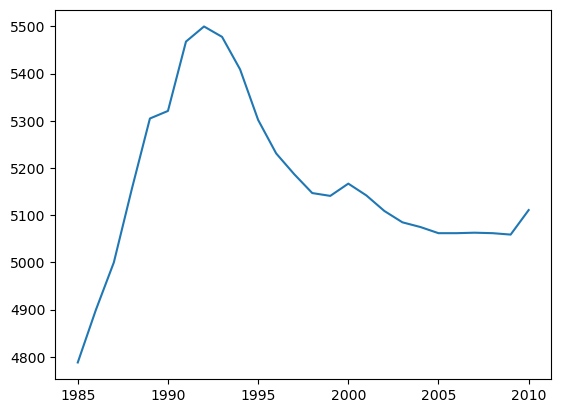

In [38]:
# 라이브러리 불러오기
import matplotlib.pyplot as plt

# 시각화
plt.plot(pop['year'], pop['k_male'])
plt.show()

- y축에 여러 값을 표시할 수 있습니다. 이때는 범례를 표시하는 것이 좋습니다.

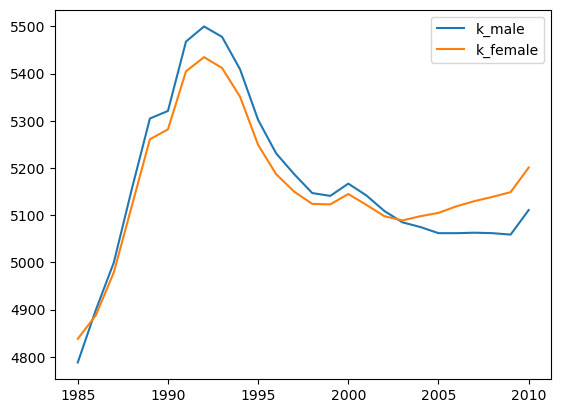

In [39]:
# 시각화
plt.plot(pop['year'], pop[['k_male', 'k_female']])
plt.legend(['k_male', 'k_female'])
plt.show()

## 4.6.데이터프레임 조인(Merge)

- **merge()** 함수를 사용 두 데이터프레임을 지정한 키 값을 기준으로 병합할 수 있습니다.

<img src='https://raw.githubusercontent.com/Jangrae/img/master/join.png' width=600, align="left"/>

### 4.6.1.데이터 읽어오기

In [40]:
# 서울 인구정보 읽어오기 #1
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'
pop01 = pd.read_csv(path)

# 확인
pop01.head(10)

,year,k_male,k_female
0,1981,4160,4191
1,1982,4160,4191
2,1983,4160,4191
3,1984,4160,4191
4,1985,4160,4191
5,1986,4899,4888
6,1987,5000,4979
7,1988,5156,5120
8,1989,5305,5261
9,1990,5321,5282


In [41]:
# 서울 인구정보 읽어오기 #2
path = 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
pop02 = pd.read_csv(path)

# 확인
pop02.head(10)

,year,f_male,f_female
0,1985,7,6
1,1986,7,5
2,1987,6,5
3,1988,5,5
4,1989,6,5
5,1990,5,4
6,1991,18,14
7,1992,19,16
8,1993,19,17
9,1994,21,19


### 4.6.2.inner 조인

- 같은 이름의 열이 있으면 on 옵션을 지정하지 않아도 그 열을 기준으로 조인됩니다.
- 그래도 기준 열을 명시적으로 지정해 주기를 권고합니다.
- how='inner' 옵션은 기본 옵션값이므로 생략할 수 있습니다.

In [42]:
# 조인
pop = pd.merge(pop01, pop02, on='year', how='inner')

# 확인
pop.head(10)

,year,k_male,k_female,f_male,f_female
0,1985,4160,4191,7,6
1,1986,4899,4888,7,5
2,1987,5000,4979,6,5
3,1988,5156,5120,5,5
4,1989,5305,5261,6,5
5,1990,5321,5282,5,4
6,1991,5468,5405,18,14
7,1992,5500,5435,19,16
8,1993,5478,5412,19,17
9,1994,5409,5351,21,19


### 4.6.3.outer 조인

- how='outer' 옵션을 지정합니다.

In [43]:
# 조인
pop = pd.merge(pop01, pop02, on='year',  how='outer')

# 확인
pop.head(10)

,year,k_male,k_female,f_male,f_female
0,1981,4160,4191,NaN,NaN
1,1982,4160,4191,NaN,NaN
2,1983,4160,4191,NaN,NaN
3,1984,4160,4191,NaN,NaN
4,1985,4160,4191,7.0,6.0
5,1986,4899,4888,7.0,5.0
6,1987,5000,4979,6.0,5.0
7,1988,5156,5120,5.0,5.0
8,1989,5305,5261,6.0,5.0
9,1990,5321,5282,5.0,4.0


<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_30.png' width=120 align="left"/>

[문1] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 1-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 1-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요.
    - 단, read_csv() 함수 사용시  index_col='year' 옵션을 지정하세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 1-3) 세 개의 데이터프레임을 outer 방식으로 연결해 pop 데이터프레임을 만드세요.
- 1-4) pop 데이터프레임 인덱스를 초기화 하세요. 단 기존 인덱스 값을 버리지 마세요.

[문2] pop 데이터프레임 상위 10개 행을 확인하세요.

[문3] 결측치가 어느 정도 존재하는 지 확인하세요.

[문4] 모든 결측치는 뒤에 오는 값으로 채우세요.

[문5] 결측치가 남아 있는지 확인하세요.

[문6] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 6-1) pandas 라이브러리를 pd 별칭을 주어 불러오세요.
- 6-2) 다음 경로의 파일들을 불러와 **pop01, pop02, pop03** 데이터프레임을 만드세요.
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h01.csv'    
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h02.csv'
    - 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_pop_h03.csv'
- 6-3) 세 개의 데이터프레임을 inner 방식으로 **조인(merge)**해 pop 데이터프레임을 만드세요.

[문7] pop 데이터프레임 상위 10개 행을 확인하세요.

[문8] 다음 요구사항에 맞게 순서대로 구문을 작성하고 확인하세요.

- 8-1) 다음 공식에 따라 pop 데이터프레임에 k_total, f_total, male, female, total 열을 추가하세요.
    - k_total = k_male + k_female
    - f_total = f_male + f_female
    - male = k_male + f_male
    - female = k_female + f_female
    - total = k_total + f_total
- 8-2) year, total, male, female 열만 추출해 pop_sum 데이터프레임을 선언하세요.
- 8-3) pop_sum 데이터프레임 상위 10개 행을 조회하세요.

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_30e.png' width=45 align="left"/>